# Descriptive analysis of local transportation


This is Exploratory Descriptive Analisys of expendure with local transportation. So we will create three notebook to explore the data of the follows subquotas: 'Taxi, toll and parking', 'Automotive vehicle renting or charter' and 'Fuels and lubricants'. We basically used the same analysis used by Irio in his descriptive analysis of all dataset in https://github.com/datasciencebr/serenata-de-amor/blob/master/develop/2016-08-13-irio-descriptive-analysis.ipynb

The anlisys of others subquota ara in:

'Automotive vehicle renting or charter': work in progress

'Fuels and lubricants': work in progress

### This first notebook is about subquota 'Taxi, toll and parking'

Importing the dataset

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
data = pd.read_csv('data/2017-07-04-reimbursements.xz',
                   parse_dates=[16],
                   low_memory=False,
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str,})

All reimbursement of subquota 'Taxi, toll and parking' will be set in **data_taxi** variable, this is the main data who we will will use in this notebook.

In [3]:
data_taxi = data[data['subquota_description'] == 'Taxi, toll and parking']

## Since 2013 was 82028 documents of reimbursement.

In [5]:
print(data_taxi.shape)

(82028, 31)


In [7]:
data_taxi.head()

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
787125,2013,1001,5279620,0.0,462.98,4455,DILCEU SPERAFICO,73768,444,2015.0,...,2013-11-21 00:00:00,462.98,0.0,462.98,11,0,NaN,NaN,1074463,0.0
787193,2013,1001,5322894,0.0,463.48,4530,DILCEU SPERAFICO,73768,444,2015.0,...,2013-12-23 00:00:00,463.48,0.0,463.48,12,0,NaN,NaN,1086947,0.0
787845,2013,1003,5284413,0.0,80.00,4460,DOMINGOS DUTRA,74197,72,2011.0,...,2013-11-25 00:00:00,80.00,0.0,80.00,11,0,NaN,NaN,1075791,0.0
787881,2013,1003,5292845,0.0,46.00,4465,DOMINGOS DUTRA,74197,72,2011.0,...,2013-12-02 00:00:00,46.00,0.0,46.00,12,0,NaN,NaN,1078244,0.0
789307,2013,1006,5286676,0.0,18.00,4461,EDINHO ARAÚJO,73447,344,2015.0,...,2013-12-02 00:00:00,18.00,0.0,18.00,12,0,NaN,NaN,1076442,0.0


In [9]:
data_taxi.iloc[0]

year                                            2013
applicant_id                                    1001
document_id                                  5279620
reimbursement_value_total                          0
total_net_value                               462.98
reimbursement_numbers                           4455
congressperson_name                 DILCEU SPERAFICO
congressperson_id                              73768
congressperson_document                          444
term                                            2015
state                                             PR
party                                             PP
term_id                                           55
subquota_number                                  122
subquota_description          Taxi, toll and parking
subquota_group_id                                  0
subquota_group_description                       nan
supplier                       VIA FACIL - SEM PARAR
cnpj_cpf                              04088208

All the expedures sums more than **R$2.6 Million**

In [11]:
data_taxi['net_values'].sum()

2678372.5100000002

In [13]:
data_taxi['net_values'].describe()

count    82028.000000
mean        32.651930
std         94.715565
min          0.100000
25%          5.300000
50%         10.300000
75%         25.200000
max       2671.400000
Name: net_values, dtype: float64

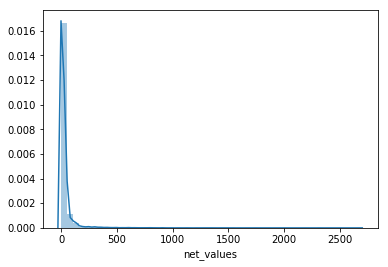

In [14]:
sns.distplot(data_taxi['net_values'])

The most expensive reimbursement was **R$2.671**

In [15]:
most_expensive_reimbursement = \
    data_taxi[data_taxi['net_values'] == data_taxi['net_values'].max()].iloc[0]
most_expensive_reimbursement

year                                                       2017
applicant_id                                               2437
document_id                                             6242634
reimbursement_value_total                                     0
total_net_value                                          2671.4
reimbursement_numbers                                      5784
congressperson_name                               MAGDA MOFATTO
congressperson_id                                        166402
congressperson_document                                     431
term                                                       2015
state                                                        GO
party                                                        PR
term_id                                                      55
subquota_number                                             122
subquota_description                     Taxi, toll and parking
subquota_group_id                       

Here we considered outliers all 0,5% biggest reimbursement values. We found 410 outliers in a total of R$426,024.32.

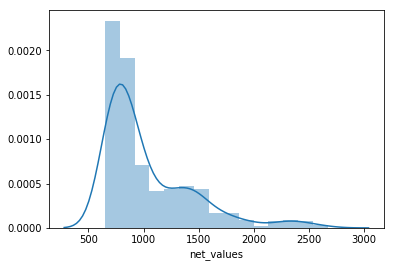

In [16]:
data_taxi = data_taxi.sort_values('net_values', ascending=False)
outliers = data_taxi.head(math.floor(len(data_taxi)*0.005))
sns.distplot(outliers['net_values'])

In [17]:
len(outliers)

410

In [18]:
outliers['net_values'].sum()

426024.32000000001

In [19]:
outliers

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
1591611,2017,2437,6242634,0.0,2671.40,5784,MAGDA MOFATTO,166402,431,2015.0,...,2017-03-02 00:00:00,2750.00,78.60,2671.40,2,0,NaN,NaN,1370414,0.0
1606502,2017,3013,6246899,0.0,2574.81,5788,MARCELO SQUASSONI,118594,369,2015.0,...,2017-03-31 00:00:00,2574.81,0.00,2574.81,3,0,NaN,NaN,1371324,0.0
992713,2014,1167,5563397,0.0,2500.00,4850,SALVADOR ZIMBALDI,73559,391,2011.0,...,2014-09-23 00:00:00,3206.20,706.20,2500.00,9,0,NaN,NaN,1155664,0.0
1035312,2014,1815,5533245,0.0,2500.00,4808,DR. UBIALI,141498,541,2011.0,...,2014-09-18 00:00:00,2823.86,323.86,2500.00,9,0,NaN,NaN,1146085,0.0
1583845,2017,2267,6268956,0.0,2430.82,5826,FRANCISCO FLORIANO,160677,297,2015.0,...,2017-04-22 00:00:00,2430.82,0.00,2430.82,4,0,NaN,NaN,1379361,0.0
1521399,2016,3013,5972150,0.0,2413.85,5418,MARCELO SQUASSONI,118594,369,2015.0,...,2016-03-31 00:00:00,2413.85,0.00,2413.85,3,0,NaN,NaN,1282605,0.0
1504641,2016,2973,6051588,0.0,2400.00,5512,JOAQUIM PASSARINHO,178910,33,2015.0,...,2016-06-20 00:00:00,2400.00,0.00,2400.00,7,0,NaN,NaN,1307898,0.0
1521521,2016,3013,6177837,0.0,2339.33,5638,MARCELO SQUASSONI,118594,369,2015.0,...,2016-11-29 00:00:00,2339.33,0.00,2339.33,11,0,NaN,NaN,1348347,0.0
1591631,2017,2437,6261931,0.0,2317.60,5822,MAGDA MOFATTO,166402,431,2015.0,...,2017-04-03 00:00:00,3850.00,1532.40,2317.60,3,0,NaN,NaN,1376384,0.0
1521493,2016,3013,6095827,0.0,2317.56,5546,MARCELO SQUASSONI,118594,369,2015.0,...,2016-07-30 00:00:00,2317.56,0.00,2317.56,7,0,NaN,NaN,1321471,0.0


## Who are these applicants?

In total 531 congressperson ask by reimbursement and most of them (75%) received R$5,884.43. 

But some congresperson received more them R$50.000,00 in the same perriod.

In [27]:
len(data_taxi['applicant_id'].unique())

531

In [28]:
applicants_by_net_value = \
    pd.DataFrame(data_taxi.groupby(['applicant_id'], as_index=False).sum()[['applicant_id', 'net_values']])

In [29]:
congressperson_list = data_taxi[
    ['applicant_id', 'congressperson_name', 'party', 'state']]
congressperson_list = congressperson_list. \
    drop_duplicates('applicant_id', keep='first')
ranking = pd.merge(applicants_by_net_value,
                   congressperson_list,
                   how='left',
                   on='applicant_id').sort_values('net_values', ascending=False)
ranking.head(10)

,applicant_id,net_values,congressperson_name,party,state
223,2238,62568.95,ZECA DIRCEU,PT,PR
167,1854,52910.40,JÔ MORAES,PCdoB,MG
225,2240,51457.88,ALESSANDRO MOLON,REDE,RJ
193,1947,49115.02,VANDERLEI MACRIS,PSDB,SP
317,2409,45053.49,NELSON MARCHEZAN JUNIOR,PSDB,RS
330,2437,43855.95,MAGDA MOFATTO,PR,GO
150,1799,43282.26,CHICO D'ANGELO,PT,RJ
367,2887,38643.18,DR. SINVAL MALHEIROS,PTN,SP
454,3013,36650.56,MARCELO SQUASSONI,PRB,SP
464,3029,34354.66,BETO SALAME,PP,PA


In [30]:
ranking['net_values'].describe()

count      531.000000
mean      5044.016026
std       8397.255893
min          2.500000
25%        328.765000
50%       1603.700000
75%       5884.435000
max      62568.950000
Name: net_values, dtype: float64

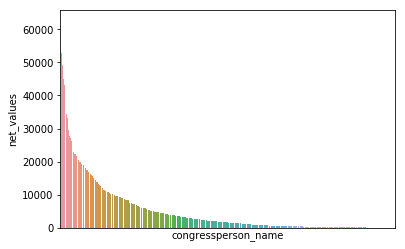

In [31]:
graph = sns.barplot(x='congressperson_name',
                    y='net_values',
                    data=ranking)
graph.axes.get_xaxis().set_ticks([]); None

# Suppliers

There are 1.797 suppliers, two of them are more than R$480.000. They are SINPETAXI, syndicate of taxi from Brasilia and CENTRO DE GESTAO DE MEIOS DE PAGAMENTO S.A., owner of SEM PARAR, company of payment of toll.

In [83]:
suppliers_list = pd.DataFrame(data_taxi.groupby(['cnpj_cpf'], as_index=False)['net_values'].sum())
suppliers_list = suppliers_list.sort_values('net_values', ascending=False)
suppliers_list

,cnpj_cpf,net_values
2,00031708000100,521118.19
402,04088208000165,487818.29
672,07424109000103,45667.10
1394,37990298000134,41582.23
1476,52378239000101,39189.57
251,02451848000162,37425.90
995,12623662000105,37156.15
1588,60537263089981,33757.50
1401,38069159000135,32617.62
4,00031708000371,30692.50


In [84]:
suppliers_list['net_values'].describe()

count      1797.000000
mean       1234.805965
std       17086.954787
min           1.100000
25%          20.000000
50%          52.000000
75%         181.000000
max      521118.190000
Name: net_values, dtype: float64

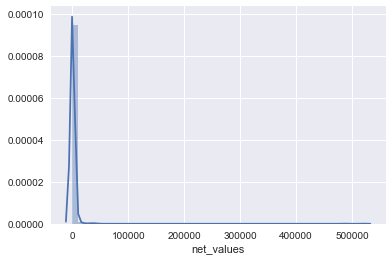

In [52]:
sns.distplot(suppliers_list['net_values'])

Here we considered outliers all 1% biggest suppliers. We found 17 outliers in a total of R$1.439.806.92

R$1.008.936,47 from SINPETAXI and SEM PARAR

R$430.870,44 from other companies

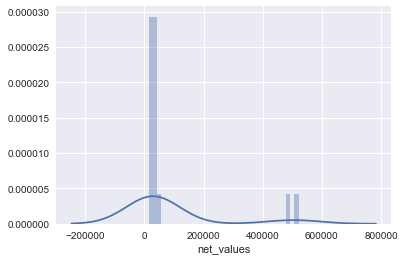

In [102]:
outliers_suppliers = suppliers_list.head(math.floor(len(suppliers_list)*0.01))
sns.distplot(outliers_suppliers['net_values'])

In [103]:
outliers_suppliers['net_values'].describe()

count        17.000000
mean      84694.525294
std      158404.535386
min       15000.000000
25%       20797.000000
50%       32617.620000
75%       39189.570000
max      521118.190000
Name: net_values, dtype: float64

In [104]:
outliers_suppliers['net_values'].sum()

1439806.9299999997

In [106]:
outliers_suppliers['net_values'].head(2).sum()

1008936.4799999999

In [108]:
outliers_suppliers['net_values'].tail(len(outliers_suppliers)-2).sum()

430870.44999999984

In [54]:
outliers_suppliers = suppliers_list[~suppliers_list.isin(data_wo_outliers_suppliers)['cnpj_cpf']]
print(len(outliers_suppliers), len(outliers_suppliers) / len(suppliers_list))

2 0.0011129660545353367


# Conclusion and next steps

We could note there a long tail in the reimbursements, there a group of congresspeople who expend much more then others. We could observe too, two big suppliers, a taxi syndicate from Brasilia and a company of payment of toll. The sugestion of next stepes are:
- split data of taxi, parking and toll.
- check the expenses in the time (by year, month and day)
- cross the data of "Taxi, toll and parking" with 'Automotive vehicle renting or charter' and 'Fuels and lubricants'